### TTim example of pumping test analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ttim import *

Load data of two observation wells

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
to1 = drawdown[:,0] / 60 / 24
ho1 = -drawdown[:,1]
ro1 = 30

drawdown = np.loadtxt('data/oudekorendijk_h90.dat')
to2 = drawdown[:,0] / 60 / 24
ho2 = -drawdown[:,1]
ro2 = 90

Pumping discharge

In [3]:
Qo = 788

Create model

In [4]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


Create calibration object, add parameters and first series. Fit the model. The chi-square value is the mean of the squared residuals at the optimum.

In [5]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-4)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=True)
display(cal.parameters)
print('rmse:', cal.rmse())
print('mse:', cal.rmse() ** 2 * len(ho1))
h1a = ml.head(ro1, 0, to1, 0) # simulated head
h2a = ml.head(ro2, 0, to2, 0) # simulated head

................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 34
    # variables        = 2
    chi-square         = 0.03407764
    reduced chi-square = 0.00106493
    Akaike info crit   = -230.786130
    Bayesian info crit = -227.733409
[[Variables]]
    kaq0:  68.6397730 +/- 1.43819795 (2.10%) (init = 10)
    Saq0:  1.6071e-05 +/- 1.5821e-06 (9.84%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.891


optimal       std perc_std  pmin  pmax initial  \
kaq0      68.6398  1.438198  2.09528  -inf   inf      10   
Saq0  1.60707e-05  0.000002  9.84458  -inf   inf  0.0001   

                        parray  
kaq0       [68.63977303108574]  
Saq0  [1.6070732564873654e-05]

rmse: 0.031658860783793714
mse: 0.034077637848339476


In [6]:
# second observation well
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=50)
cal.set_parameter(name='Saq0', initial=1.5e-5)
cal.series(name='obs1', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0) # simulated head
h2b = ml.head(ro2, 0, to2, 0) # simulated head

....................................
Fit succeeded.


optimal       std perc_std  pmin  pmax  initial  \
kaq0     71.5825  1.573950  2.19879  -inf   inf       50   
Saq0  2.9107e-05  0.000002  6.65754  -inf   inf  1.5e-05   

                       parray  
kaq0      [71.58246640830718]  
Saq0  [2.910701703574875e-05]

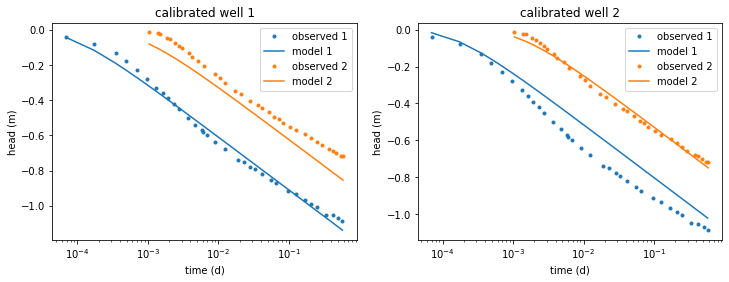

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1a[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2a[0], 'C1', label='model 2')
plt.title('calibrated well 1')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1b[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2b[0], 'C1', label='model 2')
plt.title('calibrated well 2')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();

### Add wellbore storage

In [8]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, rc=0.2, tsandQ=[(0, 788)], layers=0)
ml.solve()

self.neq  1
solution complete


In [9]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.fit(report=False)
display(cal.parameters)
h1a = ml.head(ro1, 0, to1, 0) # simulated head
h2a = ml.head(ro2, 0, to2, 0) # simulated head

.....................................................................
Fit succeeded.


optimal           std perc_std  pmin  pmax initial  \
kaq0      80.8856  1.762533e+00  2.17904  -inf   inf      10   
Saq0  5.48726e-06  8.133163e-07  14.8219  -inf   inf   1e-05   
rc       0.289103  1.712507e-02  5.92351  0.01   1.0     0.2   

                        parray  
kaq0       [80.88563318907522]  
Saq0  [5.4872587991125894e-06]  
rc       [0.28910337107735706]

In [10]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)
h1b = ml.head(ro1, 0, to1, 0) # simulated head
h2b = ml.head(ro2, 0, to2, 0) # simulated head

.........................................
Fit succeeded.


optimal           std perc_std  pmin  pmax initial  \
kaq0      88.1556  1.424251e+00  1.61561  -inf   inf      10   
Saq0  1.14684e-05  9.102371e-07  7.93689  -inf   inf   1e-05   
rc       0.640503  2.819260e-02  4.40164  0.01   1.0     0.2   

                        parray  
kaq0       [88.15561383825873]  
Saq0  [1.1468428567176638e-05]  
rc        [0.6405027193856927]

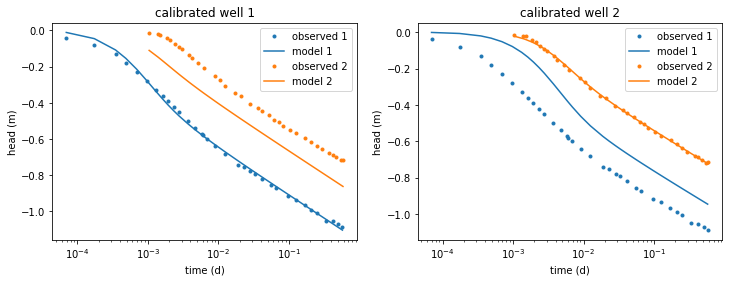

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1a[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2a[0], 'C1', label='model 2')
plt.title('calibrated well 1')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend()
plt.subplot(122)
plt.semilogx(to1, ho1, 'C0.', label='observed 1')
plt.semilogx(to1, h1b[0], 'C0', label='model 1')
plt.semilogx(to2, ho2, 'C1.', label='observed 2')
plt.semilogx(to2, h2b[0], 'C1', label='model 2')
plt.title('calibrated well 2')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();

### Two observation wells simultaneously

In [12]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=10)
cal.set_parameter(name='Saq0', initial=1e-5)
cal.set_parameter(name='rc', parameter=w.rc, initial=0.2, pmin=0.01, pmax=1)
cal.series(name='obs1', x=ro1, y=0, layer=0, t=to1, h=ho1)
cal.series(name='obs2', x=ro2, y=0, layer=0, t=to2, h=ho2)
cal.fit(report=False)
display(cal.parameters)

......................................................
Fit succeeded.


optimal       std perc_std  pmin  pmax initial  \
kaq0      66.097  1.881795  2.84702  -inf   inf      10   
Saq0  2.5394e-05  0.000003  11.4473  -inf   inf   1e-05   
rc     0.0100104  2.504583  25019.7  0.01   1.0     0.2   

                       parray  
kaq0      [66.09703823087615]  
Saq0  [2.539403531306147e-05]  
rc     [0.010010435955114824]

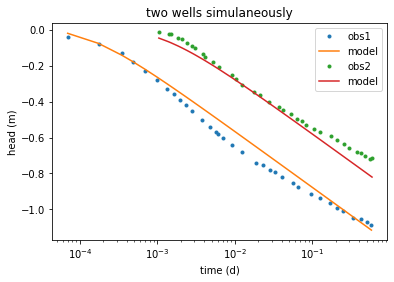

In [13]:
h1 = ml.head(ro1, 0, to1, 0)
plt.semilogx(to1, ho1, '.', label='obs1')
plt.semilogx(to1, h1[0], label='model')
h2 = ml.head(ro2, 0, to2, 0)
plt.semilogx(to2, ho2, '.', label='obs2')
plt.semilogx(to2, h2[0], label='model')
plt.title('two wells simulaneously')
plt.xlabel('time (d)')
plt.ylabel('head (m)')
plt.legend();